In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
from vary import GaussianVAE
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
from altair import Chart

tf.logging.set_verbosity(tf.logging.ERROR)#logging.getLogger('tensorflow').setLevel(logging.WARNING)

Using TensorFlow backend.


In [3]:
(X_train, y_train_label), (X_test, y_test_label) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train_label, 10)
y_test = np_utils.to_categorical(y_test_label, 10)

In [12]:
model = GaussianVAE(n_latent_dim=2, n_jobs=-1, n_iter=10, optimizer='RMSProp')

In [13]:
model.fit(X_train, y_train)

In [14]:
z_latent = np.vstack(model.transform(X_test))

In [15]:
data = pd.DataFrame({'x': z_latent[:, 0], 'y': z_latent[:, 1], 'label': y_test_label})

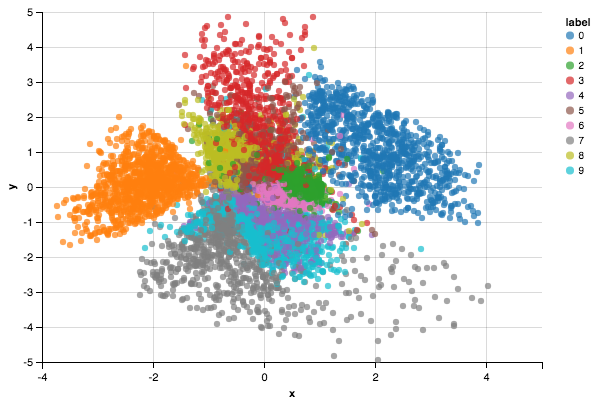

In [16]:
Chart(data).mark_circle().encode(
    x='x',
    y='y',
    color='label:N')

### Householder Flow

In [7]:
model = GaussianVAE(n_latent_dim=2, normalizing_flow='householder', n_jobs=-1, n_iter=2, optimizer='RMSProp')
model.fit(X_train, y_train)

In [8]:
z_latent = np.vstack(model.transform(X_test))

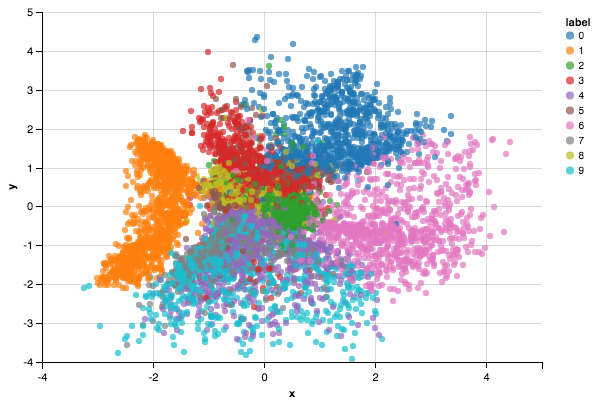

In [9]:
data = pd.DataFrame({'x': z_latent[:, 0], 'y': z_latent[:, 1], 'label': y_test_label})
Chart(data).mark_circle().encode(
    x='x',
    y='y',
    color='label:N')